## Capstone 2: Telco Customer Churn Prediction  

**1. Data Loading**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from library import save_file


In [2]:
#load the original downloaded excel file from Kaggle

df = pd.read_csv('Excel_Files/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The raw data has been loaded as a pandas dataframe. Next we will analyze the data: total number of rows and columns and column types. 

**2. Data Analysis**

In [3]:
df.shape

(7043, 21)

There are a total of 7043 rows and 21 columns. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Out of 21 columns: 18 are of type 'object', 2 are of type 'int' and 1 is of type float. 

Next we will look if the columns are numerical or categorical and whether the ones of type 'object' need to be converted to 'int' or 'float' or any other. 

In [5]:
# statistics for column index 1,5,18
print(df.describe().T)
print(df['SeniorCitizen'].value_counts())

                 count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75  
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [6]:
# statistics for column index 0
print(df['customerID'].describe())
print(df['customerID'].value_counts())

count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


In [7]:
# statistics for column index 2
print(df['gender'].describe())
print(df['gender'].value_counts())

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
Male      3555
Female    3488
Name: gender, dtype: int64


In [8]:
# statistics for column index 3
print(df['Partner'].describe())
print(df['Partner'].value_counts())

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
No     3641
Yes    3402
Name: Partner, dtype: int64


In [9]:
# statistics for column index 4
print(df['Dependents'].describe())
print(df['Dependents'].value_counts())

count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
No     4933
Yes    2110
Name: Dependents, dtype: int64


In [10]:
# statistics for column index 6
print(df['PhoneService'].describe())
print(df['PhoneService'].value_counts())

count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object
Yes    6361
No      682
Name: PhoneService, dtype: int64


In [11]:
# statistics for column index 7
print(df['MultipleLines'].describe())
print(df['MultipleLines'].value_counts())

count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [12]:
# statistics for column index 8
print(df['InternetService'].describe())
print(df['InternetService'].value_counts())

count            7043
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [13]:
# statistics for column index 9
print(df['OnlineSecurity'].describe())
print(df['OnlineSecurity'].value_counts())

count     7043
unique       3
top         No
freq      3498
Name: OnlineSecurity, dtype: object
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [14]:
# statistics for column index 10
print(df['OnlineBackup'].describe())
print(df['OnlineBackup'].value_counts())

count     7043
unique       3
top         No
freq      3088
Name: OnlineBackup, dtype: object
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [15]:
# statistics for column index 11
print(df['DeviceProtection'].describe())
print(df['DeviceProtection'].value_counts())

count     7043
unique       3
top         No
freq      3095
Name: DeviceProtection, dtype: object
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [16]:
# statistics for column index 12
print(df['TechSupport'].describe())
print(df['TechSupport'].value_counts())

count     7043
unique       3
top         No
freq      3473
Name: TechSupport, dtype: object
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [17]:
# statistics for column index 13
print(df['StreamingTV'].describe())
print(df['StreamingTV'].value_counts())

count     7043
unique       3
top         No
freq      2810
Name: StreamingTV, dtype: object
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [18]:
# statistics for column index 14
print(df['StreamingMovies'].describe())
print(df['StreamingMovies'].value_counts())

count     7043
unique       3
top         No
freq      2785
Name: StreamingMovies, dtype: object
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [19]:
# statistics for column index 15
print(df['Contract'].describe())
print(df['Contract'].value_counts())

count               7043
unique                 3
top       Month-to-month
freq                3875
Name: Contract, dtype: object
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [20]:
# statistics for column index 16
print(df['PaperlessBilling'].describe())
print(df['PaperlessBilling'].value_counts())

count     7043
unique       2
top        Yes
freq      4171
Name: PaperlessBilling, dtype: object
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [21]:
# statistics for column index 17
print(df['PaymentMethod'].describe())
print(df['PaymentMethod'].value_counts())

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [22]:
# statistics for column index 19
print(df['TotalCharges'].describe())
print(df['TotalCharges'].value_counts())

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64


In [23]:
# statistics for column index 20
print(df['Churn'].describe())
print(df['Churn'].value_counts())

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object
No     5174
Yes    1869
Name: Churn, dtype: int64


#### Dataset Attributes Analysis:

- **customerID**: 
    - A unique alphanumeric ID for each customer.  
    - Original dtype: object
    - Can be dropped from the dataset as this provides no information about Churn. 
- **gender**:
    - Categorical attribute with values:'Female' or 'Male'
    - Original dtype: object
    - Assign 0-Female and 1-Male
- **SeniorCitizen**:
    - Categorical attribute with values: 0 or 1. 
    - Original dtype: int
- **Partner**:
    - Categorical attribute with values:'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No and 1-Yes
- **Dependents**:
    - Categorical attribute with values:'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No and 1-Yes
    - Need to check any dependency with 'Partner' attribute. It is likely that when the customer has no partner the dependents might be liekly 0 too. 
- **Tenure**:
    - Numerical attribute with values corresponding to number of months with the company. 
    - Original dtype: Int
- **PhoneService**:
    - Categorical attribute with values:'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No and 1-Yes
- **MultipleLines**:
    - Categorical attribute with values:'No' or 'Yes' or 'No phone service'
    - Original dtype: object
    - Assign 0-No phone service, 1-No and 2-Yes
    - The number of customers with 'No phone service' is same number of customer with 'No' for 'PhoneService' column. It is likely the same set of customers. This probably means the information in 'PhoneService' is redundant. Need to verify by correlation or some other way. 
- **InternetService**:
    - Categorical attribute with values:'No' or 'DSL' or 'Fiber Optic'
    - Original dtype: object
    - Assign 0-No, 1-DSL, 2-Fiber Optic
- **OnlineSecurity**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes 
- **OnlineBackup**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes 
- **DeviceProtection**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes 
- **TechSupport**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes 
- **StreamingTV**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes 
- **StreamingMovies**:
    - Categorical attribute with values:'No internet service' or 'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No internet Service, 1-No, 2-Yes
- **Contract**:
    - Categorical attribute with values:'Month-to-month' or 'One-Year' or 'Two-Year'
    - Original dtype: object
    - Assign 0-Month-to-month, 1-One-year, 2-Two-years
- **PaperlessBilling**:
    - Categorical attribute with values:'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No, 1-Yes
- **PaymentMethod**:
    - Categorical attribute with 4 values:'Electronic check' or 'Mailed check' or 'Bank transfer (automatic)' or 'Credit card (automatic)'
    - Original dtype: object
    - Assign 0, 1, 2 and 3 respectively. 
- **MonthlyCharges**:
    - Numerical attribute for amount charged to customer each month.  
    - Original dtype: Float.    
- **TotalCharges**:
    - Seems like a numerical attribute for total amount charged to customer. 
    - Original dtype: object
    - Convert to Float. 
- **Churn**:
    - This is the target attribute. Categorical attribute with values:'No' or 'Yes'
    - Original dtype: object
    - Assign 0-No, 1-Yes

**3.Check for missing values**

In [24]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [27]:
#Drop the customer ID column

df.drop(columns='customerID', inplace=True)

In [28]:
df['gender'].replace(to_replace='Female', value=0, inplace=True)
df['gender'].replace(to_replace='Male', value=1, inplace=True)

df['Partner'].replace(to_replace='No', value=0, inplace=True)
df['Partner'].replace(to_replace='Yes', value=1, inplace=True)

df['Dependents'].replace(to_replace='No', value=0, inplace=True)
df['Dependents'].replace(to_replace='Yes', value=1, inplace=True)

df['PhoneService'].replace(to_replace='No', value=0, inplace=True)
df['PhoneService'].replace(to_replace='Yes', value=1, inplace=True)

df['MultipleLines'].replace(to_replace='No phone service', value=0, inplace=True)
df['MultipleLines'].replace(to_replace='No', value=1, inplace=True)
df['MultipleLines'].replace(to_replace='Yes', value=2, inplace=True)

df['InternetService'].replace(to_replace='No', value=0, inplace=True)
df['InternetService'].replace(to_replace='DSL', value=1, inplace=True)
df['InternetService'].replace(to_replace='Fiber optic', value=2, inplace=True)

df['OnlineSecurity'].replace(to_replace='No internet service', value=0, inplace=True)
df['OnlineSecurity'].replace(to_replace='No', value=1, inplace=True)
df['OnlineSecurity'].replace(to_replace='Yes', value=2, inplace=True)

df['OnlineBackup'].replace(to_replace='No internet service', value=0, inplace=True)
df['OnlineBackup'].replace(to_replace='No', value=1, inplace=True)
df['OnlineBackup'].replace(to_replace='Yes', value=2, inplace=True)

df['DeviceProtection'].replace(to_replace='No internet service', value=0, inplace=True)
df['DeviceProtection'].replace(to_replace='No', value=1, inplace=True)
df['DeviceProtection'].replace(to_replace='Yes', value=2, inplace=True)

df['TechSupport'].replace(to_replace='No internet service', value=0, inplace=True)
df['TechSupport'].replace(to_replace='No', value=1, inplace=True)
df['TechSupport'].replace(to_replace='Yes', value=2, inplace=True)

df['StreamingTV'].replace(to_replace='No internet service', value=0, inplace=True)
df['StreamingTV'].replace(to_replace='No', value=1, inplace=True)
df['StreamingTV'].replace(to_replace='Yes', value=2, inplace=True)

df['StreamingMovies'].replace(to_replace='No internet service', value=0, inplace=True)
df['StreamingMovies'].replace(to_replace='No', value=1, inplace=True)
df['StreamingMovies'].replace(to_replace='Yes', value=2, inplace=True)

df['Contract'].replace(to_replace='Month-to-month', value=0, inplace=True)
df['Contract'].replace(to_replace='One year', value=1, inplace=True)
df['Contract'].replace(to_replace='Two year', value=2, inplace=True)

df['PaperlessBilling'].replace(to_replace='No', value=0, inplace=True)
df['PaperlessBilling'].replace(to_replace='Yes', value=1, inplace=True)

df['PaymentMethod'].replace(to_replace='Electronic check', value=0, inplace=True)
df['PaymentMethod'].replace(to_replace='Mailed check', value=1, inplace=True)
df['PaymentMethod'].replace(to_replace='Bank transfer (automatic)', value=2, inplace=True)
df['PaymentMethod'].replace(to_replace='Credit card (automatic)', value=3, inplace=True)

df['Churn'].replace(to_replace='No', value=0, inplace=True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)


In [29]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [30]:
print(df.describe().T)

                   count         mean          std    min     25%       50%  \
gender            7043.0     0.504756     0.500013   0.00    0.00     1.000   
SeniorCitizen     7043.0     0.162147     0.368612   0.00    0.00     0.000   
Partner           7043.0     0.483033     0.499748   0.00    0.00     0.000   
Dependents        7043.0     0.299588     0.458110   0.00    0.00     0.000   
tenure            7043.0    32.371149    24.559481   0.00    9.00    29.000   
PhoneService      7043.0     0.903166     0.295752   0.00    1.00     1.000   
MultipleLines     7043.0     1.325004     0.642730   0.00    1.00     1.000   
InternetService   7043.0     1.222916     0.778877   0.00    1.00     1.000   
OnlineSecurity    7043.0     1.069999     0.706051   0.00    1.00     1.000   
OnlineBackup      7043.0     1.128212     0.738369   0.00    1.00     1.000   
DeviceProtection  7043.0     1.127219     0.737868   0.00    1.00     1.000   
TechSupport       7043.0     1.073548     0.708201  

In [31]:
# Generating a subset of the entire dataframe to check if a relationship exists between the three features

df2 = df.loc[:, ['tenure', 'MonthlyCharges','TotalCharges' ]]
print(df2.shape)
df2.head()

(7043, 3)


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Is there a mathematical relationship between TotalCharges, MonthlyCharges and tenure?

It seems like TotalCharges ~= MonthlyCharges * Tenure but not exaclty. 

Wondering if we can plugin use this formula for the missing values in TotalCharges. 

In [32]:

missing_total_charges = df[df.isnull()['TotalCharges'] == True].index.tolist()
print(missing_total_charges)

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [33]:
df.loc[missing_total_charges, :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,0,1,2,1,2,2,2,1,2,1,2,52.55,NaN,0
753,1,0,0,1,0,1,1,0,0,0,0,0,0,0,2,0,1,20.25,NaN,0
936,0,0,1,1,0,1,1,1,2,2,2,1,2,2,2,0,1,80.85,NaN,0
1082,1,0,1,1,0,1,2,0,0,0,0,0,0,0,2,0,1,25.75,NaN,0
1340,0,0,1,1,0,0,0,1,2,2,2,2,2,1,2,0,3,56.05,NaN,0
3331,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,1,19.85,NaN,0
3826,1,0,1,1,0,1,2,0,0,0,0,0,0,0,2,0,1,25.35,NaN,0
4380,0,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,1,20.00,NaN,0
5218,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,1,19.70,NaN,0
6670,0,0,1,1,0,1,2,1,1,2,2,2,2,1,2,0,1,73.35,NaN,0


There are 11 'nan' values in the 'TotalCharges' column. The 'tenure' column has 0 value for those entries. So it is not possible to use the 'tenure' * 'MonthlyCharges' to fill in the missing values. 

Will drop these rows and move ahead. 

In [54]:
# Drop the 11 rows and re-index dataframe

df.drop(index=missing_total_charges, inplace=True)
print("Index values after dropping 11 rows", "\n", df.index)
df.reset_index(inplace=True)
print("Index values after re-indexing data", "\n", df.index)
df.describe().T


Index values after dropping 11 rows 
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
           dtype='int64', length=7032)
Index values after re-indexing data 
 RangeIndex(start=0, stop=7032, step=1)


,count,mean,std,min,25%,50%,75%,max
level_0,7032.0,3515.500000,2030.107879,0.00,1757.7500,3515.500,5273.2500,7031.00
index,7032.0,3521.562144,2032.832448,0.00,1762.7500,3521.500,5282.2500,7042.00
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,1.325228,0.642585,0.00,1.0000,1.000,2.0000,2.00
InternetService,7032.0,1.224118,0.778643,0.00,1.0000,1.000,2.0000,2.00


For the three numerical features we will check for any outliers. We will use the boxplots to show the data distribution: Median, IQR (25th ercentile and 75th percentile) and the whiskers (>75th percentile+1.5*IQR  or <25th percentile-1.5*IQR). Any data points beyond the whiskers will be represented by dots and will be considered as outliers. 

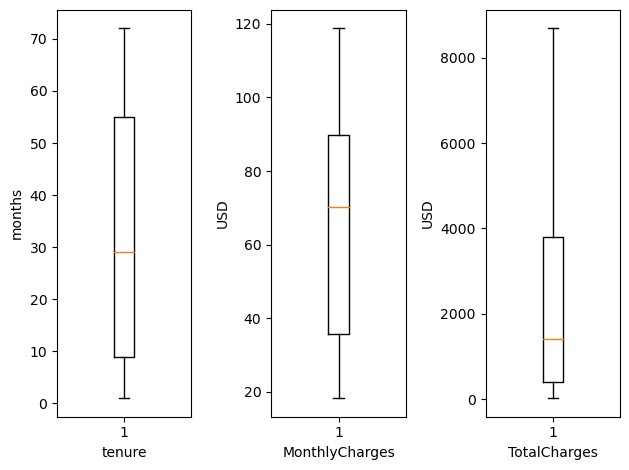

In [67]:
#Boxplots for 'tenure', 'MonthlyCharges', 'TotalCharges'

fig, ax = plt.subplots(1,3)

ax[0].boxplot(df['tenure'])
ax[0].set_xlabel('tenure')
ax[0].set_ylabel('months')

ax[1].boxplot(df['MonthlyCharges'])
ax[1].set_xlabel('MonthlyCharges')
ax[1].set_ylabel('USD')

ax[2].boxplot(df['TotalCharges'])
ax[2].set_xlabel('TotalCharges')
ax[2].set_ylabel('USD')

fig.tight_layout()
plt.show()

From the boxplots we see that there are no outliers in our dataset. 

In [66]:
# Save the cleaned dataframe as a csv file

df.to_csv('Excel_Files/Telco_customer_churn_cleaned.csv')